<a href="https://colab.research.google.com/github/mariananlemos/Data_Analysis_Amazonia/blob/main/Data_Analysis_Amazonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydeck -q

import pydeck as pdk
import pandas as pd

# Importe seu arquivo CSV contendo os dados de desmatamento na Amazônia
df = pd.read_csv('/content/deter-amz-aggregated-16-10-2023-19_43_56.csv')

# Crie a camada HexagonLayer
layer = pdk.Layer(
    'HexagonLayer',  # Defina a camada como HexagonLayer
    df,  # DataFrame que contém os dados de desmatamento
    get_position=['longitude', 'latitude'],  # Colunas com as coordenadas geográficas
    auto_highlight=True,  # Realce automaticamente os hexágonos ao passar o cursor
    elevation_scale=50,  # Escala de altura dos hexágonos
    pickable=True,  # Permita a seleção dos hexágonos
    elevation_range=[0, 3000],  # Faixa de altura dos hexágonos
    extruded=True,  # Hexágonos com dimensão de altura
    coverage=1  # Cobertura da camada
)

# Defina a visualização (centrada na Amazônia)
view_state = pdk.ViewState(
    longitude=-60,  # Longitude central da Amazônia
    latitude=-5,  # Latitude central da Amazônia
    zoom=5,  # Defina o nível de zoom inicial do mapa
    min_zoom=5,  # Nível mínimo de zoom permitido
    max_zoom=15,  # Nível máximo de zoom permitido
    pitch=40.5,  # Ângulo de inclinação do mapa
    bearing=0  # Ângulo de rotação do mapa
)

# Combine tudo em um objeto 'Deck'
r = pdk.Deck(layers=[layer], initial_view_state=view_state)

# Salve o mapa como um arquivo HTML
r.to_html('desmatamento_amazonia.html')


<IPython.core.display.Javascript object>

Fonte:

http://terrabrasilis.dpi.inpe.br/downloads/

https://www.ipcc.ch/data/

http://terrabrasilis.dpi.inpe.br/app/dashboard/alerts/legal/amazon/aggregated/#

In [ ]:
# Importe seu arquivo CSV contendo os dados de desmatamento na Amazônia
df = pd.read_csv('/content/deter-amz-aggregated-16-10-2023-19_43_56.csv')

# Crie a camada HexagonLayer
layer = pdk.Layer(
    'HexagonLayer',  # Defina a camada como HexagonLayer
    df,  # DataFrame que contém os dados de desmatamento
    get_position=['longitude', 'latitude'],  # Colunas com as coordenadas geográficas
    get_fill_color='[255, desmatamento, 0]',  # Use a coluna 'desmatamento' para a cor (R, G, B)
    auto_highlight=True,  # Realce automaticamente os hexágonos ao passar o cursor
    elevation_scale=50,  # Escala de altura dos hexágonos
    pickable=True,  # Permita a seleção dos hexágonos
    elevation_range=[0, 3000],  # Faixa de altura dos hexágonos
    extruded=True,  # Hexágonos com dimensão de altura
    coverage=1  # Cobertura da camada
)

# ...

# Salve o mapa como um arquivo HTML
r.to_html('desmatamento_amazonia.html')


<IPython.core.display.Javascript object>

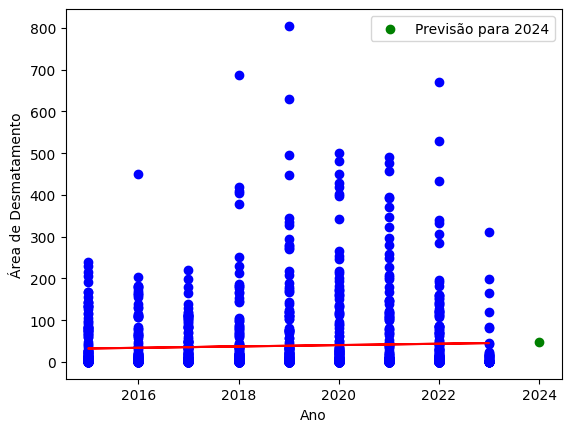

Previsão de área de desmatamento para 2024: 46.77740464196131
Erro Quadrático Médio (MSE): 6135.2259440961825
Coeficiente de Determinação (R²): 0.00012231161568765359


In [ ]:
# Importe as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregue os dados
dados = pd.read_csv('/content/deter-amz-aggregated-16-10-2023-19_43_56.csv')

# Pré-processamento para extrair os valores de ano
dados['year'] = dados['year'].str.extract('(\d+)').astype(float)

# Suponha que você deseja usar a coluna 'year' como recurso (X) e a coluna 'area' como rótulo (y)
X = dados['year'].values.reshape(-1, 1)
y = dados['area'].values

# Divida os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie e treine o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_treinamento, y_treinamento)

# Faça previsões para o ano de 2024
ano_2024 = np.array([[2024]])
previsao_2024 = modelo.predict(ano_2024)

# Avalie o modelo
y_pred = modelo.predict(X_teste)
mse = mean_squared_error(y_teste, y_pred)
r2 = r2_score(y_teste, y_pred)

# Visualize os resultados
plt.scatter(X, y, color='blue')
plt.plot(X, modelo.predict(X), color='red')
plt.scatter(ano_2024, previsao_2024, color='green', marker='o', label='Previsão para 2024')
plt.xlabel('Ano')
plt.ylabel('Área de Desmatamento')
plt.legend()
plt.show()

print(f"Previsão de área de desmatamento para 2024: {previsao_2024[0]}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")
